# 주피터 노트북(파이썬)으로 온도 데이타를 SQL에 저장하고 시계열분석

<img src="https://raw.githubusercontent.com/leehaesung/SQLite3_with_LTE_CatM1/master/01_Images/01_Setting.png" height="400" width="450" >

* How to install Paho-MQTT :
```
sudo pip install paho-mqtt
```

In [6]:
!pip install paho-mqtt

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## CREATE TABLE

* SQLite <b>CREATE TABLE</b> statement is used to <b>create</b> a new table in any of the given database. Creating a basic table involves naming the table and defining its columns and each column's data type.

In [7]:
import sqlite3

conn = sqlite3.connect('sqliteLTECatM1')
conn.execute('''CREATE TABLE HOME(
    LOCAL INT PRIMARY KEY NOT NULL, 
    TEMP INT NOT NULL
    );''')
print("Table created successfully");

conn.close()

Table created successfully


## DROP TABLE

* SQLite <b>DROP TABLE</b> statement is used to <b>remove</b> a table definition and all associated data, indexes, triggers, constraints, and permission specifications for that table.

In [41]:
import sqlite3
conn = sqlite3.connect('sqliteLTECatM1')
cur = conn.cursor()
sql = "DROP TABLE HOME;"
cur.execute(sql)
print("Deleted the table successfully");
conn.commit()
conn.close()

OperationalError: database is locked

## INSERT QUERY FOR UNIT TESTING

* SQLite <b>INSERT INTO</b> Statement is used to <b>add</b> new rows of data into a table in the database.

In [8]:
import sqlite3

conn = sqlite3.connect('sqliteLTECatM1')
print("Opened database successfully");

conn.execute("INSERT INTO HOME (LOCAL,TEMP) \
      VALUES (20171201221159, 24)");

conn.commit()
print("Records created successfully");
conn.close()

Opened database successfully
Records created successfully


## SEARCH THE SPECIFIC TEMPERATURE DATA

* SQLite <b>SELECT</b> statement is used to <b>fetch</b> the data from a SQLite database table which returns data in the form of a result table. These result tables are also called result sets.

In [9]:
import sqlite3

conn = sqlite3.connect('sqliteLTECatM1')
print("Opened database successfully");

cursor = conn.execute("SELECT * from HOME WHERE TEMP = 24")
for row in cursor:
    print("Local Time   = ", row[0])
    print("Temperature  = ", row[1])
    print("\n")
   

print("Operation done successfully");
conn.close()

Opened database successfully
Local Time   =  20171201221155
Temperature  =  24


Local Time   =  20171201221159
Temperature  =  24


Operation done successfully


In [10]:
#!/usr/bin/python

import sqlite3

conn = sqlite3.connect('sqliteLTECatM1');
print("Opened database successfully");
print("");
print("   Local Time |T(°C)");
print("===========================");
cursor = conn.execute("SELECT * from HOME WHERE TEMP = 24")
for row in cursor:
    print(row[0],row[1])
    
conn.close()

Opened database successfully

   Local Time |T(°C)
20171201221155 24
20171201221159 24


#### Searching Temperature Data

In [11]:
import sqlite3

def search_temperature(temp):
    conn = sqlite3.connect('sqliteLTECatM1')

    str1 = "SELECT * FROM HOME WHERE TEMP = "
    str2 = str(temp)
    str3 = ";"
    sql = str1 + str2 + str3
    cursor = conn.execute(sql)

    print("Opened database successfully")
    print("")
    print("   Local Time |T(°C)")
    print("===========================")
    
    for row in cursor:
        print(row[0],row[1])

In [12]:
# Put any temperature.
search_temperature(24)

Opened database successfully

   Local Time |T(°C)
20171201221155 24
20171201221159 24


## Eclipse Paho™ MQTT Python Pub/Sub Client
- Please wait few seconds.

In [1]:
import sys
import json

try:
    import paho.mqtt.subscribe as subscribe
except ImportError:
    # This part is only required to run the example from within the examples
    # directory when the module itself is not installed.
    #
    # If you have the module installed, just use "import paho.mqtt.subscribe"
    import os
    import inspect
    cmd_subfolder = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile( inspect.currentframe() ))[0],"../src")))
    if cmd_subfolder not in sys.path:
        sys.path.insert(0, cmd_subfolder)
    import paho.mqtt.subscribe as subscribe
    import paho.mqtt.client

topics = ['catm1topic']

m = subscribe.simple(topics, hostname="broker.hivemq.com", retained=False, msg_count=2)
for a in m:
    print(a.topic)
    print(a.payload)
    da = json.loads(a.payload)
    print(da)
    json_data = da["temperature"]
    print(json_data)

catm1topic
b'{"device":"catm1","temperature":"29.218"}'
{'device': 'catm1', 'temperature': '29.218'}
29.218
catm1topic
b'{"device":"catm1","temperature":"29.218"}'
{'device': 'catm1', 'temperature': '29.218'}
29.218


In [ ]:
import sys
try:
    import paho.mqtt.subscribe as subscribe
except ImportError:
    # This part is only required to run the example from within the examples
    # directory when the module itself is not installed.
    #
    # If you have the module installed, just use "import paho.mqtt.subscribe"
    import os
    import inspect
    cmd_subfolder = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile( inspect.currentframe() ))[0],"../src")))
    if cmd_subfolder not in sys.path:
        sys.path.insert(0, cmd_subfolder)
    import paho.mqtt.subscribe as subscribe
    import paho.mqtt.client

def print_msg(client, userdata, message):
    print("%s : %s" % (message.topic, message.payload))
    buf = message.payload
    
subscribe.callback(print_msg, "catm1topic", hostname="broker.hivemq.com")

catm1topic : b'{"device":"catm1","temperature":"29.011"}'
catm1topic : b'{"device":"catm1","temperature":"29.962"}'


##  INSERT QUERY (IN REAL TIME)

* SQLite <b>INSERT INTO</b> Statement is used to <b>add</b> new rows of data into a table in the database.

In [2]:
import sys 
import sqlite3
import locale
import json
import datetime

conn = sqlite3.connect('sqliteLTECatM1')
print("Opened database successfully")
print("")
print("INSERT OPERATION")
print("    Date      | Temperature[°C]:")
print("==================================")

try:
    import paho.mqtt.subscribe as subscribe
except ImportError:
    # This part is only required to run the example from within the examples
    # directory when the module itself is not installed.
    #
    # If you have the module installed, just use "import paho.mqtt.subscribe"
    import os
    import inspect
    cmd_subfolder = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile( inspect.currentframe() ))[0],"../src")))
    if cmd_subfolder not in sys.path:
        sys.path.insert(0, cmd_subfolder)
    import paho.mqtt.subscribe as subscribe
    import paho.mqtt.client

topics = ['catm1topic']

m = subscribe.simple(topics, hostname="broker.hivemq.com", retained=False, msg_count=5)
for a in m:
    def print_msg(client, userdata, message):
        data = message.payload
        # {"device":"catm1","temperature":"29.011"}
        local = datetime.datetime.now().strftime("%y%m%d%H%M%S")
       
        jsonData = json.loads(data)
        temp = str(jsonData['temperature'])         
    
        print(local," | ",temp)
    
        str1 = "INSERT INTO HOME (LOCAL,TEMP) \
          VALUES ("
        str2 = local 
        str3 = ", "
        str4 = temp
        str5 = " )"
        insert = str1 + str2 + str3 + str4 + str5
        conn.execute(insert)
        conn.commit()

Opened database successfully

INSERT OPERATION
    Date      | Temperature[°C]:


In [3]:
# Date
import datetime

x = datetime.datetime.now()

print(x.second)
print(datetime.datetime.utcnow())
print(datetime.datetime.now().strftime("%y%m%d%H%M%S"))

55
2019-06-03 16:10:55.965496
190604011055


## SELECT QUERY

* SQLite <b>SELECT</b> statement is used to <b>fetch</b> the data from a SQLite database table which returns data in the form of a result table. These result tables are also called result sets.

In [3]:
#!/usr/bin/python

import sqlite3

conn = sqlite3.connect('sqliteLTECatM1')
print("Opened database successfully")
print("")
print("    Date      | Temperature[°C]:")
print("==================================")
cursor = conn.execute("SELECT * from HOME WHERE TEMP")
for row in cursor:
    print(row[0]," | ",row[1])
    
conn.close()

Opened database successfully

    Date      | Temperature[°C]:
190604011155  |  27.011
190604011206  |  27.011
190604011223  |  28.011
190604011233  |  28.011
190604011244  |  28.011
190604011300  |  28.216
190604011310  |  28.216
190604011320  |  28.216
190604011335  |  29.218
190604011345  |  29.218


## SELECT QUERY & PUSH DATA INTO BOX

In [6]:
import sqlite3

class Stack:
    
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def push(self, item):
        self.items.append(item)

    def pop(self):
        return self.items.pop()

    def peek(self):
        return self.items[len(self.items)-1]

    def size(self):
        return len(self.items)

timeBox = Stack()
tempBox = Stack()

conn = sqlite3.connect('sqliteLTECatM1')
print("Opened database successfully")
print("")
print("    Date      | Temperature[°C]:")
print("==================================")
cursor = conn.execute("SELECT * from HOME WHERE TEMP")
for row in cursor:
    timeBox.push(row[0])
    tempBox.push(row[1])
    print(row[0]," | ",row[1])
    
    
    
conn.close()

Opened database successfully

    Date      | Temperature[°C]:
190604011155  |  27.011
190604011206  |  27.011
190604011223  |  28.011
190604011233  |  28.011
190604011244  |  28.011
190604011300  |  28.216
190604011310  |  28.216
190604011320  |  28.216
190604011335  |  29.218
190604011345  |  29.218


In [8]:
print(tempBox.items)

[27.011, 27.011, 28.011, 28.011, 28.011, 28.216, 28.216, 28.216, 29.218, 29.218]


In [9]:
len(tempBox.items)

10

In [122]:
len(humBox.items)

92

In [10]:
max = len(tempBox.items)

for count in range(1,max+1):
    timeBox.push(count)
    #print (count)

In [12]:
print(timeBox.items)
xTime = timeBox.items

[190604011155, 190604011206, 190604011223, 190604011233, 190604011244, 190604011300, 190604011310, 190604011320, 190604011335, 190604011345, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [14]:
print(xTime)

[190604011155, 190604011206, 190604011223, 190604011233, 190604011244, 190604011300, 190604011310, 190604011320, 190604011335, 190604011345, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [16]:
max = 5
for count in range(1,max+1):
    ya = tempBox.pop()
    print(ya)

28.011
28.011
28.011
27.011
27.011


## DELETE QUERY

* SQLite <b>DELETE QUERY</b> is used to <b>delete</b> the existing records from a table. You can use WHERE clause with <b>DELETE QUERY</b> to <b>delete</b> the selected rows, otherwise all the records would be deleted.

In [23]:
import sqlite3

conn = sqlite3.connect('sqliteLTECatM1')
print("Opened database successfully");

conn.execute("DELETE from HOME where LOCAL = 190604011310;")
#conn.execute("DELETE FROM HOME WHERE TIME BETWEEN 1514107143669 AND 1514107268441;")
conn.commit()
print("Total number of rows deleted :", conn.total_changes)

print("")
print("    Date      | Temperature[°C]:")
print("==================================")
cursor = conn.execute("SELECT * from HOME")
for row in cursor:
    print(row[0]," | ",row[1])

print("DELETE Operation done successfully");
conn.close()

Opened database successfully


OperationalError: database is locked

## DROP TABLE

* SQLite <b>DROP TABLE</b> statement is used to <b>remove</b> a table definition and all associated data, indexes, triggers, constraints, and permission specifications for that table.

In [39]:
import sqlite3
conn = sqlite3.connect('sqliteLTECatM1')
cur = conn.cursor()
sql = "DROP TABLE HOME;"
cur.execute(sql)
print("Deleted the table successfully");
conn.commit()
conn.close()

OperationalError: database is locked

# TensorFlow Analytics

* Linear Regression
     ```
     Linear Regression Model = W * x + b
     ```

## TensorFlow Analytics

In [4]:
# From https://www.tensorflow.org/get_started/get_started
import tensorflow as tf

# Model parameters
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
# Model input and output
x = tf.placeholder(tf.float32)
linear_model = W*x + b
y = tf.placeholder(tf.float32)

# loss
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

# training data
x_train = [1, 2, 3, 4, 5]
y_train = [27.011, 27.011, 28.011, 28.011, 28.011]

# training loop
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong
for i in range(1000):
  sess.run(train, {x: x_train, y: y_train})

# evaluate training accuracy
curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))

W: [0.30001387] b: [26.710949] loss: 0.29999924


### Plotting Graph

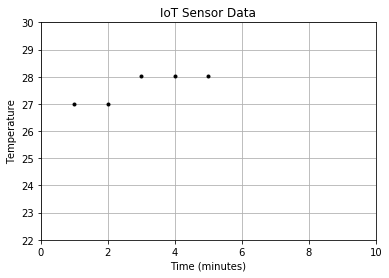

In [5]:
# "np" and "plt" are common aliases for NumPy and Matplotlib, respectively.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# x_train represents the features of our training data, the diameters of the pizzas.
# A scikit-learn convention is to name the matrix of feature vectors X. 
# Uppercase letters indicate matrices, and lowercase letters indicate vectors.

#x_train = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
#y_train = [25, 23, 24, 23, 24]

plt.figure()
plt.title('IoT Sensor Data')
plt.xlabel('Time (minutes)')
plt.ylabel('Temperature')
plt.plot(x_train, y_train, 'k.')
plt.axis([0, 10, 22, 30])
plt.grid(True)

## References

* SQLite Tutorial: https://www.tutorialspoint.com/sqlite/
* SQLite Quick Guide: https://www.tutorialspoint.com/sqlite/sqlite_quick_guide.htm
* SQLite - Python Tuotorial: https://www.tutorialspoint.com/sqlite/sqlite_python.htm
* SQLite - Python Quick Guide: https://github.com/leehaesung/SQLite-Python_Quick_Guide
* Get Started TensorFlow: https://www.tensorflow.org/get_started/get_started